In [34]:
import sys
sys.path.append('../python')
import pandas as pd
from pylab import *
from tb_DataReader import EventFeaturesReader
from tb_PulseAmpFitter import PulseAmpFitter

%matplotlib inline
dataDir = "../data/eventFeatures"

In [63]:
#run,backend, channel="222","ubcm",2
run,backend, channel = "237","ubcm",0
rd = EventFeaturesReader(dataDir,"000"+run,backend)

# 1. Fit Data

In [65]:
ch = rd.getChannel(channel)
print ch
title = "Run {}, sensor-{} {}V, {} CH{}, n={}".format(run,2, 300,backend,channel,len(ch))
# fitting
#fitter = PulseAmpFitter(ch.pulseAmp)
#sigma = ch.baseline_std.mean()
#fitter.fitRange(40,80,None)
# plot
#fitter.plot()
#plt.title(title, fontsize=14)
#plt.savefig("../plots/pulseAmpFit/langaus_{}_run{}_{}.png".format(backend,run,channel),dpi=300)

        event  ch   pulseAmp  pulsePos  baseline_mean  baseline_std  \
0          31   0    8.76461       311        127.235       1.82351   
1          46   0    4.86811       319        127.132       2.07619   
2          47   0   24.03840       298        126.962       2.17384   
3          53   0   32.01170       282        126.988       2.27095   
4          70   0   65.09350       291        126.907       2.17249   
5          73   0   76.17030       302        126.830       2.10909   
6          74   0   59.71620       279        127.284       2.03725   
7          96   0   80.42070       285        126.579       2.86820   
8         107   0   32.83970       301        127.160       2.00098   
9         114   0    5.79800       303        127.202       2.12730   
10        118   0   24.41400       304        127.586       2.17631   
11        128   0    6.93823       304        127.062       2.42585   
12        134   0    9.78631       284        127.214       1.95631   
13    

Text(0.5,1,'Run 237, sensor-2 300V, ubcm CH0, n=24679')

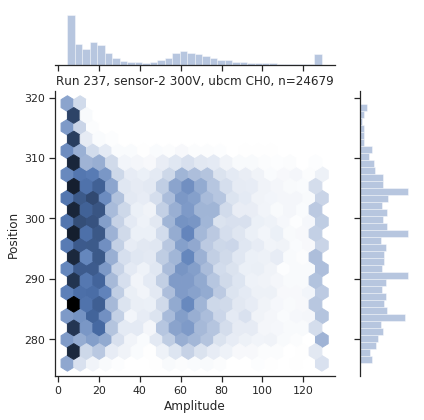

In [64]:
import seaborn as sns
sns.set(style="ticks")
jp= sns.jointplot(ch.pulseAmp, ch.pulsePos, kind="hex", color="C0",gridsize=20,ratio=4,space=0.5)
jp.set_axis_labels(r'Amplitude','Position')
#jp.ax_joint.plot([0,100])
jp.ax_joint.set_title(title)
#plt.savefig("../plots/PulseHist2D/{}_run{}_{}.png".format(backend,run,channel),dpi=300)